In [18]:
### ATOC5860 - simple_SOM_Iris_optimizeQerr
## last updated April 6, 2022

In [2]:
## import modules

from minisom import MiniSom, asymptotic_decay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from itertools import product

In [3]:
## The data are 50 samples each from three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
## Four traits were measured for every flower: the length and the width of the sepals and petals, in centimetres. 
## Based on these four traits, the scientist working with the data (Fisher) 
## investigated if it was possible to distinguish the species from each other.

### Read in the data
### Data from https://archive.ics.uci.edu/ml/datasets/Iris

### if on the internet you can use this:
#data = pd.read_csv(
#    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#    header=None,
#    sep=',')

### otherwise download the data to the folder you are running your jupyter notebook in and run this code
data = pd.read_csv('iris.data.csv',
    header=None,
    sep=',')

data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
data.dropna(how="all", inplace=True) # drops the empty line at file-end

## print a bit about the data
print(np.shape(data))
data.head()
#data.tail()

data4som=data.iloc[:,0:4].values
print(data4som.shape)

# standardize the data 
data4som = (data4som - np.mean(data4som, axis=0)) / np.std(data4som, axis=0)
#data4som

(150, 5)
(150, 4)


In [5]:
# set possible grid sizes - often equal so the SOM is square and are paired below. e.g. 3x3, 5x5, 9x9
som_grid_rows    = [3]    # (y-axis)
som_grid_columns = [1]    # (x-axis)

som_shape = (1, 3)

# spread of neighborhood function - largest value should be one smaller than som dimension, decrease by one after that
sigma            = [2.0, 1.0, 0.5]
# initial learning rate (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)
learning_rate    = [0.005, 0.05, 0.5]
# how many iterations to go through
num_iteration    = [100, 500, 1000]

# for above values, miniSOM will test test a total of 3*3*3 = 27 possible SOMs for this size. 

In [7]:
# creating list of hyperparameters to iterate through
list_of_rows = []
list_of_cols = []
list_of_sigs = []
list_of_lrts = []
list_of_itrs = []

for som_row, som_col in zip(som_grid_rows, som_grid_columns):
    for sig, lr, n_iter in product(sigma, learning_rate, num_iteration):
        list_of_rows.append(som_row)
        list_of_cols.append(som_col)
        list_of_sigs.append(sig)
        list_of_lrts.append(lr)
        list_of_itrs.append(n_iter)

# actually train som

In [9]:
# this step slow on big data because it's training all those combinations and saving the quantization errors

quant_errors = []

random_order = True
verbose = True

# empty csv
our_csv = pd.DataFrame(np.zeros((len(list_of_rows), 6), dtype=int), columns=["n_row", "n_col", "sigma", "lr", "n_iter", "q_error"])

for num_exp, (som_row, som_col, sig, lr, n_iter) in enumerate(zip(list_of_rows,list_of_cols,list_of_sigs,list_of_lrts,list_of_itrs)):
    # print out which SOM we are on
    print(num_exp)
    
    # set other attributes required for som training
    input_length = data4som.shape[1]      # Total number of points to train on per timestep
    decay_function = asymptotic_decay        # Function that reduces learning_rate and sigma at each iteration
    neighborhood_function = 'gaussian'       # Function that weights the neighborhood of a position in the map
    topology = 'rectangular'                 # Topology of the map; Possible values: 'rectangular', 'hexagonal'
    activation_distance = 'euclidean'        # Distance used to activate the map; Possible values: 'euclidean', 'cosine', 'manhattan', 'chebyshev'
    random_seed = 1                          # Random seed to use for reproducibility. Using 1.
    random_order = True
    verbose = True
    
    # initialize the SOM    
    som = MiniSom(som_row,som_col,input_length,sig,lr,decay_function,
                  neighborhood_function,topology,activation_distance,random_seed) 
    
    data = data4som
    
    som.pca_weights_init(data)  # Initializes the weights to span the first two principal components
                                # could also try random init: som.random_weights_init(data)
    
    # train the SOM!
    som.train(data,n_iter,random_order,verbose)
    
    print('yay! som training complete')
    
    our_csv.iloc[num_exp] += [som_row, som_col, sig, lr, n_iter, som.quantization_error(data)]
        
    print('on to the next one...')

0
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.07199063043129
yay! som training complete
on to the next one...
1
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.646154477907459
yay! som training complete
on to the next one...
2
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.3447386609111835
yay! som training complete
on to the next one...
3
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.4280098072644591
yay! som training complete
on to the next one...
4
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.0351224307580495
yay! som training complete
on to the next one...
5
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0180542687876568
yay! som training complete
on to the next one...
6
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.1912365944980152
yay! som training complete
on to the next one...
7
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.0084873321092875
yay! som training complete
on to

/Users/kado8663/anaconda3/envs/ATOC5860_NEW/lib/python3.10/site-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/Users/kado8663/anaconda3/envs/ATOC5860_NEW/lib/python3.10/site-packages/minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)



 quantization error: 0.9916571790925489
yay! som training complete
on to the next one...
9
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.066503719594676
yay! som training complete
on to the next one...
10
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.6180162671613467
yay! som training complete
on to the next one...
11
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.2780803783958885
yay! som training complete
on to the next one...
12
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.3785892907450745
yay! som training complete
on to the next one...
13
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.881838766641942
yay! som training complete
on to the next one...
14
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8672294889336376
yay! som training complete
on to the next one...
15
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.1817779733723701
yay! som training complete
on to the next one...
16
 [ 500 / 5

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.5059734760588075
yay! som training complete
on to the next one...
21
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.3186584398071428
yay! som training complete
on to the next one...
22
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.040193982288284
yay! som training complete
on to the next one...
23
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.074284310479971
yay! som training complete
on to the next one...
24
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.9691459080861963
yay! som training complete
on to the next one...
25
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.9001597157261184
yay! som training complete
on to the next one...
26
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.9023808697996956
yay! som training complete
on to the next one...


In [10]:
# save the CSV in case we need it later
fout = 'som_qerror_'+str(som_grid_rows[0])+'x'+str(som_grid_columns[0])+'.csv'
our_csv.to_csv(fout)

In [11]:
# read in the csv file with all the possible soms
df = pd.read_csv(fout)

In [12]:
# sort values by q_error
sorted_df = df.sort_values(['q_error'])

# grab all the qerrors and make array against which to plot
qerr_all = sorted_df.q_error
xarr_all = np.arange(1,len(qerr_all)+1,1)

# find and save the lowest qerror for top # (1)
top_n = sorted_df.head(1)
bottom_n = sorted_df.tail(1)

In [13]:
# set the training values for this winning combination
qerr = top_n['q_error'].values
sig = top_n['sigma'].values  ##.item()
lr = top_n['lr'].values ##.item()
n_iter = int(top_n['n_iter']) ##.item()

In [14]:
# set file name based on these combos
fin = 'som_'+'_'+str(som_row)+'x'+str(som_col)+'_sig'+str(sig)+'_lr'+str(lr)+'_iter'+str(n_iter)
print(fin)

som__3x1_sig[1.]_lr[0.05]_iter1000


Plotting qerror for som: 3x1


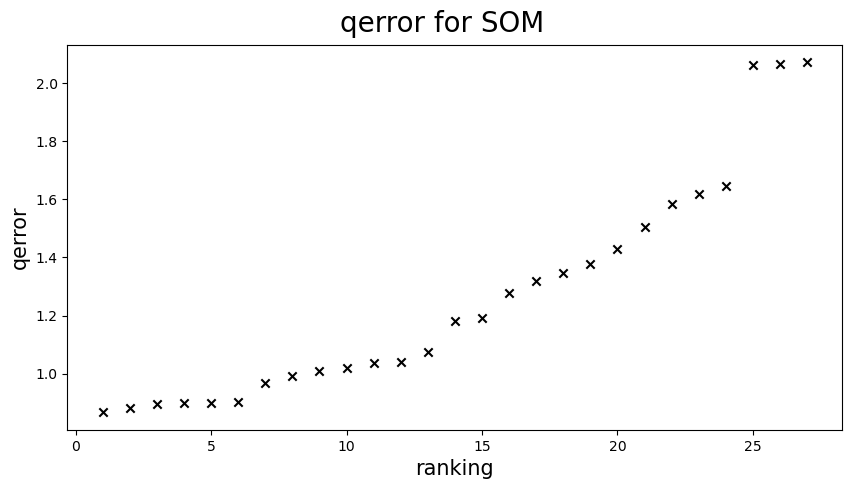

In [15]:
print('Plotting qerror for som: '+str(som_row)+'x'+str(som_col))

# Actually plot figure now
fig = plt.figure(figsize=(10,5))

# plot all SOM qerror
ax = fig.add_subplot(1,1,1)
ax.scatter(xarr_all,qerr_all,marker='x',c='black')
plt.xlabel('ranking',fontsize=15)
plt.ylabel('qerror',fontsize=15)

# Finalize figure and save
fig.suptitle('qerror for SOM',fontsize=20, y=0.95)  
fig.subplots_adjust(hspace=0.3)

plt.show()

# uncomment below to save figure
#plt.savefig('qerrors_all.png', bbox_inches='tight', dpi=200)

In [16]:
print('re-training lowest qerror only')
    
# print the qerror read in. This should match the final qerror after re-training.
print('original qerr = '+str(qerr))

# initialization of SOM
som = MiniSom(
            som_row,
            som_col,
            input_length,
            sig,
            lr,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed) 
# before training, initialize the data
som.pca_weights_init(data) 
# actually train SOM - the quantization error here should match qerr printed above
som.train(
        data,
        n_iter,
        random_order,
        verbose)
    
# save the som as a pickle to analyze later
with open(fin+'.p', 'wb') as outfile:
    pickle.dump(som, outfile)

re-training lowest qerror only
original qerr = [0.86722949]
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8672294889336376


/Users/kado8663/anaconda3/envs/ATOC5860_NEW/lib/python3.10/site-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/Users/kado8663/anaconda3/envs/ATOC5860_NEW/lib/python3.10/site-packages/minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


## Plot the node frequencies
This shows you how frequently patterns from the training data mapped to each node

[[32.66666667]
 [30.66666667]
 [36.66666667]]
100.0


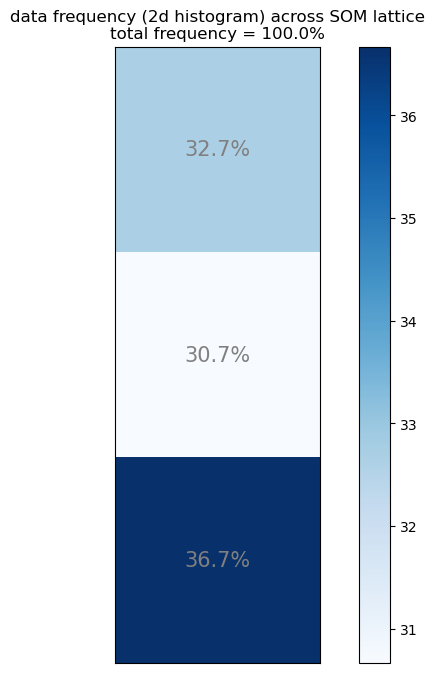

In [17]:
# open pickle
with open(fin+'.p', 'rb') as infile:
    som = pickle.load(infile)

# set frequencies
frequencies = 100.*((som.activation_response(data))/sum(sum(som.activation_response(data))))
#verify the total frequency is 100%
total = sum(sum(frequencies))
print(frequencies)
print(total)

# Plot frequencies across SOM lattice
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
im = ax.imshow(frequencies, cmap='Blues')    
# Loop over data dimensions and create text annotations in each cell
len_x, len_y = frequencies.shape
for i in range(len_x):
    for j in range(len_y):
        text = ax.text(j, i, str(round(frequencies[i, j],1))+'%', fontsize=15, ha="center", va="center", color="grey")

# Make cosmetic changes
cbar = plt.colorbar(im)
plt.title("data frequency (2d histogram) across SOM lattice" "\n" r"total frequency = "+str(total)+"%", fontsize=12)
#plt.xticks(np.arange(0,som_row, 1))
#plt.yticks(np.arange(0,som_col, 1))
plt.xticks([])
plt.yticks([])

plt.show()

# uncomment below to save figure
#plt.savefig(fin+'_freq.png', bbox_inches='tight', dpi=200)

In [19]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data4som]).T
print(winner_coordinates)

print(winner_coordinates.shape)

cluster_index=winner_coordinates[0,:]

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1
  1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2
  2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2
  2 2 1 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]
(2, 150)


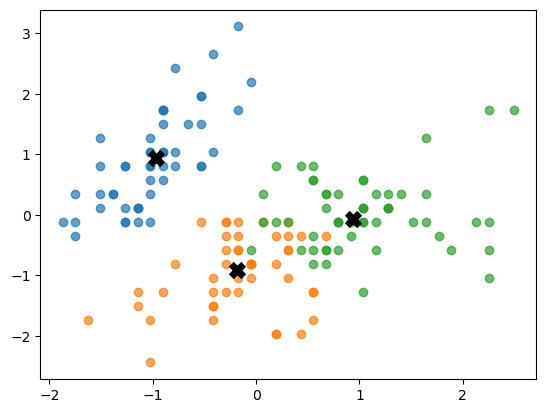

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=5, color='k', label='centroid')
    
#plt.legend();